In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/youtube/youtube_US_short.csv'
df = pd.read_csv(url)
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


# Q1

In [63]:
df.sort_values('views', ascending = False)[['title','channel_title', 'views', 'publish_time']].head(1)

,title,channel_title,views,publish_time
6181,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,149376127,2017-12-06T17:58:51.000Z


# Q2

In [64]:
df.groupby('category_id')[['views', 'channel_title']].max().sort_values('views', ascending = False).head(3)



,views,channel_title
category_id,,
24,149376127,voordeel
10,102012605,tovestyrkeVEVO
26,54155921,toofacedcosmetics


# Q3

In [65]:
features = ['views','likes','dislikes','comment_count']
df[features].corr(method = 'spearman')

,views,likes,dislikes,comment_count
views,1.000000,0.877789,0.866979,0.840532
likes,0.877789,1.000000,0.801154,0.881849
dislikes,0.866979,0.801154,1.000000,0.843331
comment_count,0.840532,0.881849,0.843331,1.000000


# Q4

<AxesSubplot:>

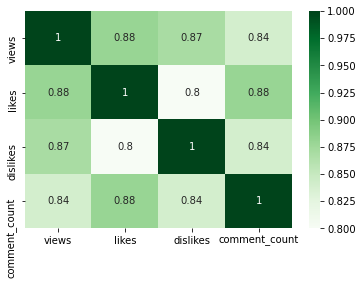

In [66]:
correlation_matrix = df[features].corr(method='spearman').round(2)
sns.heatmap(data=correlation_matrix,cmap='Greens', annot=True)

# Q5

<AxesSubplot:xlabel='likes', ylabel='comment_count'>

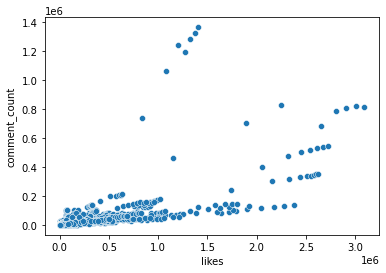

In [67]:
sns.scatterplot(data=df, x='likes', y='comment_count')
#can also swith x and y

<AxesSubplot:xlabel='views', ylabel='likes'>

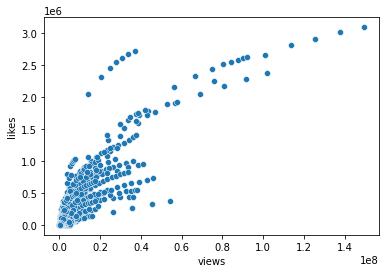

In [68]:
sns.scatterplot(data=df, x='views', y='likes')
#can also swith x and y

# Q6

In [69]:
df['year'] = pd.DatetimeIndex(df.publish_time).year


In [70]:
df[df['year'] > 2016].pivot_table('views', index='category_id', columns='year', aggfunc='sum')

year,2017,2018
category_id,,
1,8.654615e+08,144072937.0
2,7.885352e+07,8047346.0
10,4.504741e+09,839810930.0
15,1.442459e+08,32629265.0
17,3.812432e+08,61660329.0
19,5.429144e+07,7583452.0
20,5.035442e+07,84176667.0
22,7.018258e+08,67849434.0
23,1.130782e+09,197147385.0
